In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [97]:
url = "student_scores_LR.csv"
data = pd.read_csv(url)
print("Data imported successfully\n")
print("Rows: ",data.shape[0]) # Displays rows
print("Columns: ",data.shape[1]) # Displays columns
print()
data.head(5)

Data imported successfully

Rows:  25
Columns:  2



,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


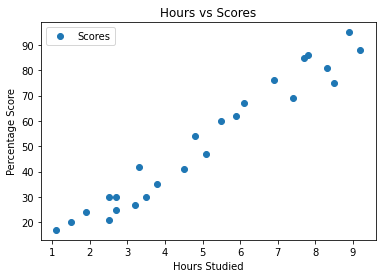

In [99]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [55]:
X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

In [56]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
Y_pred = linear_regressor.predict(X_test)  # make predictions
print(Y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [116]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': Y_pred.flatten()})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


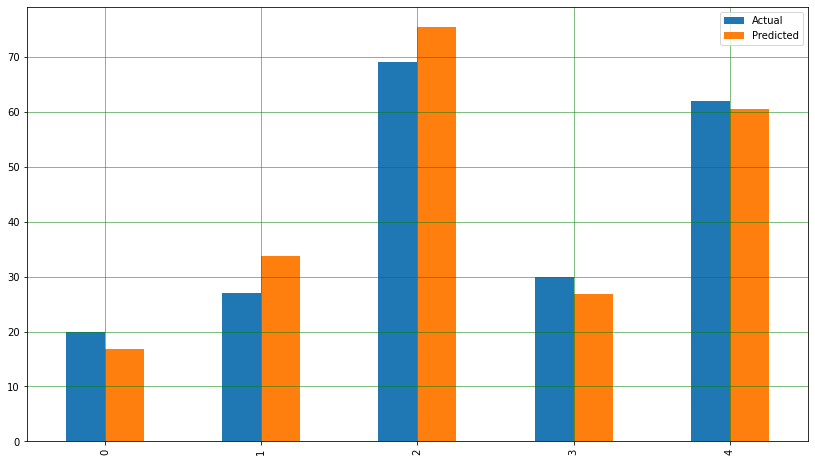

In [121]:
df1 = df.head()
df1.plot(kind='bar',figsize=(14,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

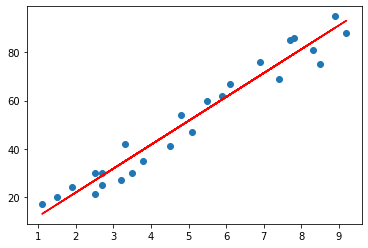

In [100]:
# Plotting the regression line
line = linear_regressor.coef_*X+linear_regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='red');
plt.show()

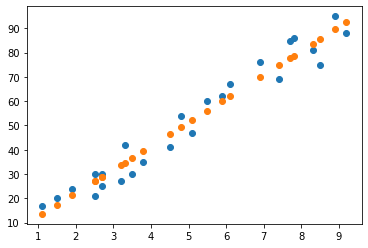

In [101]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)
pr.fit(X_poly, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
plt.scatter(X, y)
plt.scatter(X, lin_reg.predict(pr.fit_transform(X)))
plt.show()

In [113]:
hours = 9.25
own_pred = linear_regressor.predict(np.array([hours]).reshape(1, 1))
print("No of Hours =", hours)
print("Predicted Score = {}".format(own_pred[0][0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


In [60]:
from sklearn import metrics
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred))

mean_squared_error = metrics.mean_squared_error(y_test, Y_pred)
print('Mean Squared Error:', mean_squared_error)

root_mean_squared_error = math.sqrt(mean_squared_error)
print('Root Mean Squared Error:', root_mean_squared_error)

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
